<a href="https://colab.research.google.com/github/CheshtaKeshari/MatrixTest/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [62]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [64]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
regressor = Sequential()

In [67]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [68]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [69]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [70]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [71]:
regressor.add(Dense(units = 1))

In [72]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [73]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0360
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0040
Epoch 13/100


In [75]:
#Making the predictions and visualising the results
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [76]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [77]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

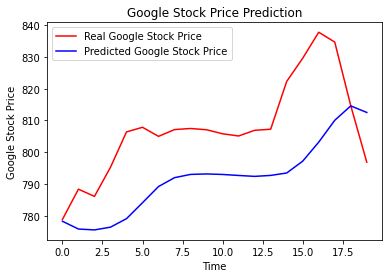

In [81]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [87]:
model = Sequential()

In [88]:
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

In [89]:
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

In [90]:
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

In [91]:
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

In [92]:
model.add(Dense(units = 1))

In [95]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 48ms/step - loss: 0.6266
Epoch 2/100
38/38 [==============================] - 2s 46ms/step - loss: 0.3594
Epoch 3/100
38/38 [==============================] - 2s 45ms/step - loss: 0.2791
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 0.2433
Epoch 5/100
38/38 [==============================] - 2s 45ms/step - loss: 0.1904
Epoch 6/100
38/38 [==============================] - 2s 46ms/step - loss: 0.1764
Epoch 7/100
38/38 [==============================] - 2s 48ms/step - loss: 0.1318
Epoch 8/100
38/38 [==============================] - 2s 45ms/step - loss: 0.1215
Epoch 9/100
38/38 [==============================] - 2s 46ms/step - loss: 0.1005
Epoch 10/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0900
Epoch 11/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0774
Epoch 12/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0760
Epoch 13/100
38/38 [=====

In [100]:
predicted_data = model.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data)

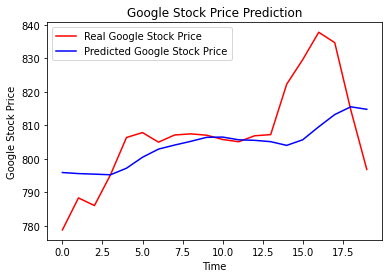

In [110]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_data, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()